In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


There are no null values.

In [4]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
# preprocessing Genre
# 0 -> non-fiction
# 1 -> fiction
def genre_count(record):
    if record == "Fiction":
        return 1
    return 0
data['Genre'] = data['Genre'].apply(genre_count)

In [6]:
data = data.drop("Name", axis=1)
data = data.drop("Author", axis=1)

In [7]:
# dependet variable --> User rating
data.head()

,User Rating,Reviews,Price,Year,Genre
0,4.7,17350,8,2016,0
1,4.6,2052,22,2011,1
2,4.7,18979,15,2018,0
3,4.7,21424,6,2017,1
4,4.8,7665,12,2019,0


# Univariate Analysis

<AxesSubplot:xlabel='User Rating', ylabel='count'>

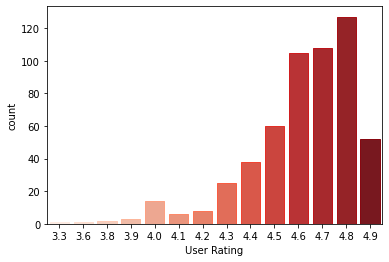

In [8]:
sns.countplot(x=data['User Rating'], 
              palette=sns.color_palette("Reds", 14),
              edgecolor=sns.color_palette("Reds", 14))

Most books are rated 

# Bi-Variate Analysis

<AxesSubplot:ylabel='count'>

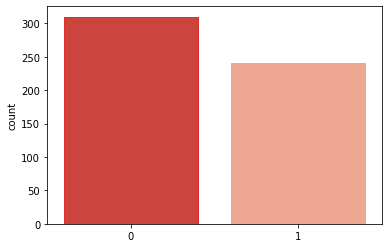

In [9]:
sns.countplot(
    x=data['Genre'].values, data=data,
    palette=sns.color_palette("Reds_r", 2),
    edgecolor=sns.color_palette("Reds_r", 2)
)
# most of the books are non-fictional

<AxesSubplot:xlabel='Price', ylabel='Count'>

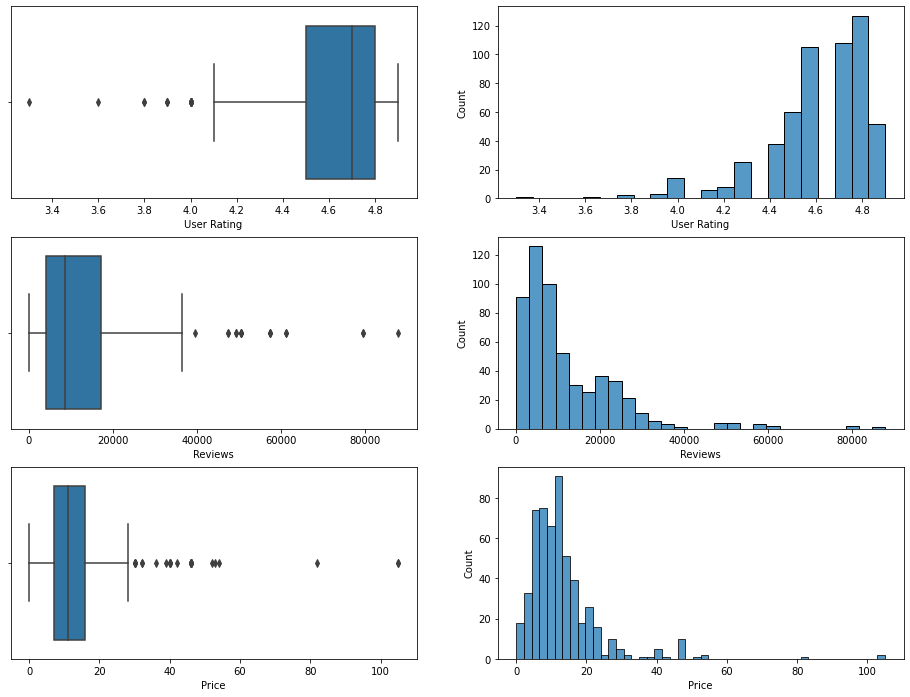

In [10]:
# distribution of each variable
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
sns.boxplot(x=data["User Rating"], ax = ax[0,0])
sns.histplot(x=data["User Rating"], ax = ax[0,1])

sns.boxplot(x=data["Reviews"], ax = ax[1,0])
sns.histplot(x=data["Reviews"], ax = ax[1,1])

sns.boxplot(x=data["Price"], ax = ax[2,0])
sns.histplot(x=data["Price"], ax = ax[2,1])

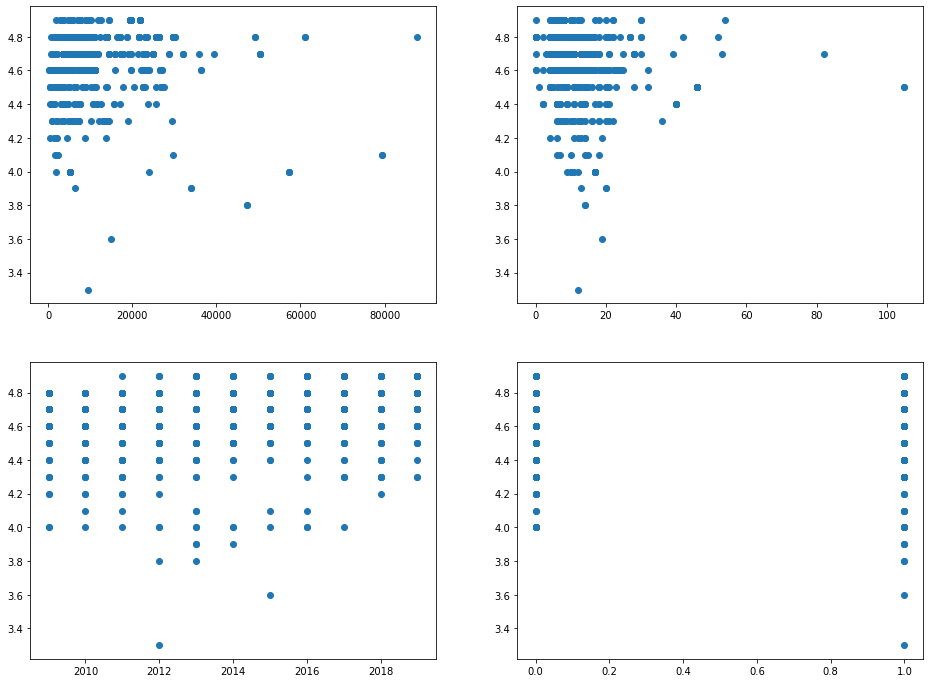

In [11]:
# comparison with user ratings...
# User Rating	Reviews	Price	Year	Genre
f, ax = plt.subplots(2, 2, figsize=(16, 12))
ratings = data['User Rating'].values
ax[0,0].scatter(data['Reviews'], ratings)
ax[0,1].scatter(data['Price'], ratings)
ax[1,0].scatter(data['Year'], ratings)
ax[1,1].scatter(data['Genre'], ratings)

# Insights from this:
* With more reviews, rating seems to drop
* Most of the books with 4+ rating cost between $ 0-30
* Fiction tends to have a little less score than non-Fiction

# Multivariate Analysis

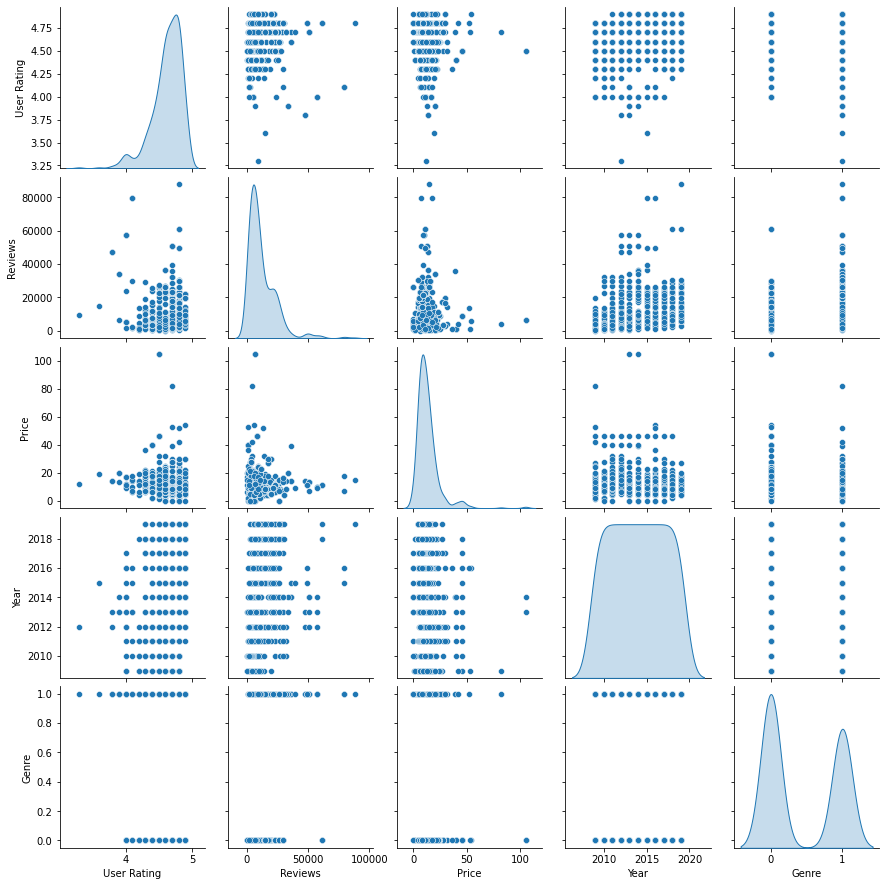

In [12]:
sns.pairplot(data, diag_kind='kde')

<AxesSubplot:>

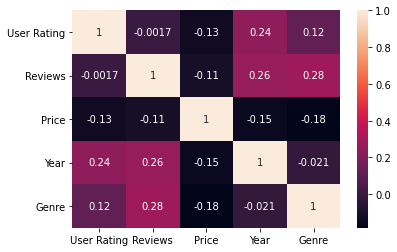

In [13]:
sns.heatmap(data.corr(), annot=True)